
**Peter Misiun**

**20886060**

**Machine Learning COMP3010**

**Assignment**

**Final Score: 0.2476**


# **Step 1: Data Preprocessing**

# 1.1: Load Data

Import neccessary libraries

In [ ]:
# for data use
import numpy as np
import pandas as pd

# saving + loading scaler
import joblib

# prints all for displays
pd.set_option('display.max_columns', None)

Load in training data

In [ ]:
# read in train.csv data set
train_processing = pd.read_csv('train.csv')
print("Loaded in dataset: train.csv")

Loaded in dataset: train.csv


# 1.2: Initial Exploration + Breif Overview of Data

Print basic information

In [ ]:
# printing shape of data
print(f"\nThe shape of train.csv is (rows, columns): {train_processing.shape}")

# printing the data types of each column
print("\nColumn data types in train.csv:")
print(train_processing.dtypes)


The shape of train.csv is (rows, columns): (10050, 25)

Column data types in train.csv:
Unnamed: 0                         float64
Tank Failure Pressure (bar)        float64
Liquid Ratio                       float64
Tank Width (m)                     float64
Tank Length (m)                    float64
Tank Height (m)                    float64
BLEVE Height (m)                   float64
Vapour Height (m)                  float64
Vapour Temperature (K)             float64
Liquid Temperature (K)             float64
Obstacle Distance to BLEVE (m)     float64
Obstacle Width (m)                 float64
Obstacle Height (m)                float64
Obstacle Thickness (m)             float64
Obstacle Angle                     float64
Status                              object
Liquid Critical Pressure (bar)     float64
Liquid Boiling Temperature (K)     float64
Liquid Critical Temperature (K)    float64
Sensor ID                          float64
Sensor Position Side               float64
Sensor P

In [ ]:
# printing first 5 rows of data
print("\nFirst 5 rows of train.csv:")
train_processing.head()


First 5 rows of train.csv:


,Unnamed: 0,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
0,3203.0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,19.0,11.0,5.0,0.39,1.0,Superheated,37.9,-1.0,152.0,18.0,2.0,19.75,5.70,3.1,0.588298
1,3204.0,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,19.0,11.0,5.0,0.40,1.0,Superheated,37.9,-1.0,152.0,19.0,3.0,20.00,-5.15,-1.5,0.551524
2,3205.0,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,19.0,11.0,5.0,0.40,1.0,Superheated,37.9,-1.0,152.0,20.0,3.0,20.00,-5.15,0.8,0.550813
3,3206.0,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,19.0,11.0,5.0,0.42,1.0,Superheated,37.9,-1.0,152.0,21.0,3.0,20.00,-5.15,3.1,0.528906
4,3207.0,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,19.0,11.0,5.0,0.39,1.0,Superheated,37.9,-1.0,152.0,22.0,4.0,20.00,-4.90,3.4,0.454363


In [ ]:
# printing last 5 rows of data
print("\nLast 5 rows of train.csv:")
train_processing.tail()


Last 5 rows of train.csv:


,Unnamed: 0,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar)
10045,10244.0,17.75,0.28,2.60,7.40,1.02,1.39,0.79,381.89,350.52,5.0,6.0,15.0,0.81,24.0,Superheated,42.5,-42.0,96.7,12.0,2.0,6.25,-0.6,13.0,0.866291
10046,12758.0,17.85,0.27,2.40,2.22,2.02,1.59,1.38,298.69,308.85,10.0,11.0,6.0,2.60,12.0,Subcooled,37.9,-1.0,152.0,15.0,2.0,11.15,2.2,3.5,0.341971
10047,9438.0,12.58,0.67,1.62,1.42,2.81,1.40,0.99,482.23,413.26,16.0,15.0,8.0,1.78,6.0,Superheated,37.9,-1.0,152.0,16.0,2.0,16.75,8.9,-1.7,0.215026
10048,8689.0,27.89,0.26,2.42,2.40,1.40,1.99,1.01,500.18,329.65,11.0,3.0,5.0,1.22,21.0,Subcooled,37.9,-1.0,152.0,23.0,4.0,12.80,4.2,2.6,0.153747
10049,10302.0,35.60,0.89,1.78,8.01,1.02,1.40,0.19,340.32,368.93,7.0,9.0,4.0,0.60,25.0,Subcooled,37.9,-1.0,152.0,16.0,2.0,7.85,7.5,-1.3,0.407445


# 1.3: Data Type Conversion

One hot encoding applied for 'Status' column

In [ ]:
# make all in status to lowercase
train_processing['Status'] = train_processing['Status'].astype(str).str.strip().str.lower()

# find rows with status empty or na, if found drop
train_processing = train_processing[train_processing['Status'].notna() & (train_processing['Status'] != '')].copy()

# get words found in status column
superheated_words = ['superheat', 'superheated', 'saperheated']
subcooled_words = ['subcool', 'subcooled', 'subcoled']

# encode superheated and subcooled status
def encode_status(status):
    if any(word in status for word in superheated_words):
        return 1, 0
    elif any(word in status for word in subcooled_words):
        return 0, 1
    else:
        # nan return for unknown, will be dropped later
        return pd.NA, pd.NA

status_encoded = train_processing['Status'].apply(lambda x: pd.Series(encode_status(x)))

status_encoded.columns = ['Status_Superheated', 'Status_Subcooled']
train_processing[['Status_Superheated', 'Status_Subcooled']] = status_encoded.astype('Int64')

# find rows with unknown status and remove them
train_processing = train_processing.dropna(subset=['Status_Superheated', 'Status_Subcooled'])

# confirm encoding done correctly
print("\nMissing values per column after Status encoding:")
print(train_processing.isnull().sum())


Missing values per column after Status encoding:
Unnamed: 0                          1
Tank Failure Pressure (bar)         2
Liquid Ratio                        2
Tank Width (m)                      1
Tank Length (m)                     2
Tank Height (m)                     2
BLEVE Height (m)                    2
Vapour Height (m)                   2
Vapour Temperature (K)             22
Liquid Temperature (K)             22
Obstacle Distance to BLEVE (m)      2
Obstacle Width (m)                  1
Obstacle Height (m)                 2
Obstacle Thickness (m)              1
Obstacle Angle                      2
Status                              0
Liquid Critical Pressure (bar)     22
Liquid Boiling Temperature (K)     22
Liquid Critical Temperature (K)    22
Sensor ID                           2
Sensor Position Side                2
Sensor Position x                   1
Sensor Position y                   1
Sensor Position z                   1
Target Pressure (bar)               1


Check above that 'status' has 0 rows with empty columns + remove it below

In [ ]:
# remove status column as no longer needed
train_processing = train_processing.drop(columns=['Status'])

# check to see dataset with status removed
print("\nMissing values per column after dropping Status:")
print(train_processing.isnull().sum())


Missing values per column after dropping Status:
Unnamed: 0                          1
Tank Failure Pressure (bar)         2
Liquid Ratio                        2
Tank Width (m)                      1
Tank Length (m)                     2
Tank Height (m)                     2
BLEVE Height (m)                    2
Vapour Height (m)                   2
Vapour Temperature (K)             22
Liquid Temperature (K)             22
Obstacle Distance to BLEVE (m)      2
Obstacle Width (m)                  1
Obstacle Height (m)                 2
Obstacle Thickness (m)              1
Obstacle Angle                      2
Liquid Critical Pressure (bar)     22
Liquid Boiling Temperature (K)     22
Liquid Critical Temperature (K)    22
Sensor ID                           2
Sensor Position Side                2
Sensor Position x                   1
Sensor Position y                   1
Sensor Position z                   1
Target Pressure (bar)               1
Status_Superheated                  0


# 1.4: Identifying and Handling Missing Values

Correct empty 'Sensor ID' values - Make in ascending order 1 - 27

In [ ]:
# sensor id values should be in ascending order from 1 to 27
def correct_empty_sensorid(series):
    series = series.copy()
    for i in range(len(series)):
        if pd.isna(series.iloc[i]):

            # look backwards for prev non nan
            prev_val = series.iloc[i-1] if i > 0 and not pd.isna(series.iloc[i-1]) else series.iloc[i-2] if i > 1 and not pd.isna(series.iloc[i-2]) else 27 # Default logic if previous is also NA

            # cyclic approach
            series.iloc[i] = 1 if prev_val == 27 else prev_val + 1

    # check all vals 1-27 after
    series = series.apply(lambda x: x if 1 <= x <= 27 else (x % 27) if (x % 27) != 0 else 27)
    return series.astype(int)

train_processing['Sensor ID'] = correct_empty_sensorid(train_processing['Sensor ID'])

# print missing values each column
print("\nEmpty values for each column after Sensor ID correction:")
print(train_processing.isnull().sum())


Empty values for each column after Sensor ID correction:
Unnamed: 0                          1
Tank Failure Pressure (bar)         2
Liquid Ratio                        2
Tank Width (m)                      1
Tank Length (m)                     2
Tank Height (m)                     2
BLEVE Height (m)                    2
Vapour Height (m)                   2
Vapour Temperature (K)             22
Liquid Temperature (K)             22
Obstacle Distance to BLEVE (m)      2
Obstacle Width (m)                  1
Obstacle Height (m)                 2
Obstacle Thickness (m)              1
Obstacle Angle                      2
Liquid Critical Pressure (bar)     22
Liquid Boiling Temperature (K)     22
Liquid Critical Temperature (K)    22
Sensor ID                           0
Sensor Position Side                2
Sensor Position x                   1
Sensor Position y                   1
Sensor Position z                   1
Target Pressure (bar)               1
Status_Superheated            

Remove rows with more than 4 missing values

In [ ]:
# identify + drop rows with more then 4 values missing
max_empty = 4

row_empty_values = train_processing.isnull().sum(axis=1)
print("\nMissing values per row distribution (before dropping rows):")
print(row_empty_values.value_counts().sort_index())

train_processing = train_processing[row_empty_values <= max_empty].copy()

#  missing per row after dropping
row_empty_values = train_processing.isnull().sum(axis=1)
print("\nMissing values per row distribution (after dropping rows):")
print("(Should show no rows with more than 4 missing entries)")
print(row_empty_values.value_counts().sort_index())


Missing values per row distribution (before dropping rows):
0     9940
1      100
19       2
Name: count, dtype: int64

Missing values per row distribution (after dropping rows):
(Should show no rows with more than 4 missing entries)
0    9940
1     100
Name: count, dtype: int64


Fill missing numerical data with median

In [ ]:
# columns to skip
skip_cols_imputation = ['Sensor ID', 'Status_Superheated', 'Status_Subcooled']

# calc median before importing
train_medians = {}
for col in train_processing.columns:
    if col not in skip_cols_imputation and train_processing[col].dtype in ['float64', 'int64']:
        median = train_processing[col].median()
        train_medians[col] = median

        # fill missing with median
        train_processing[col] = train_processing[col].fillna(median)

# save medians
joblib.dump(train_medians, 'train_medians.pkl')
print("\nSaved training data medians to train_medians.pkl")

# print info
print("\nEmpty values for each column after median imputation:")
print("(all should be 0)")
print(train_processing.isnull().sum())
print(f"\nNo. rows left after imputation: {train_processing.shape[0]}")


Saved training data medians to train_medians.pkl

Empty values for each column after median imputation:
(all should be 0)
Unnamed: 0                         0
Tank Failure Pressure (bar)        0
Liquid Ratio                       0
Tank Width (m)                     0
Tank Length (m)                    0
Tank Height (m)                    0
BLEVE Height (m)                   0
Vapour Height (m)                  0
Vapour Temperature (K)             0
Liquid Temperature (K)             0
Obstacle Distance to BLEVE (m)     0
Obstacle Width (m)                 0
Obstacle Height (m)                0
Obstacle Thickness (m)             0
Obstacle Angle                     0
Liquid Critical Pressure (bar)     0
Liquid Boiling Temperature (K)     0
Liquid Critical Temperature (K)    0
Sensor ID                          0
Sensor Position Side               0
Sensor Position x                  0
Sensor Position y                  0
Sensor Position z                  0
Target Pressure (bar)     

# 1.5: Outlier Detection and Treatment

Import necessary library

In [ ]:
from scipy.stats import zscore


Usually would only run the below once but but constantly removing outliers led to better results for models

In [ ]:
# get numeric columns excluding skip cols
# excluded due to already been done / unneeded
skip_cols_outlier = ['Sensor ID', 'Status_Superheated', 'Status_Subcooled', 'Unnamed: 0']
numeric_cols_outlier = [col for col in train_processing.select_dtypes(include=[np.number]).columns if col not in skip_cols_outlier]

# init variables
rows_removed_total = 0
iteration = 1

# make sure doesnt go through too many times
max_iterations = 9

# remove outliers
while iteration <= max_iterations:
    if train_processing.empty:
        print("DataFrame is empty, stopping outlier removal.")
        break

    # get z scores for on non empty spaces for columns + find outlier rows
    if not train_processing[numeric_cols_outlier].empty:
        col_zscores = np.abs(zscore(train_processing[numeric_cols_outlier]))
        max_zscore = 3
        find_outliers = (col_zscores > max_zscore).any(axis=1)
    else:
        find_outliers = pd.Series([False] * len(train_processing), index=train_processing.index)

    # drop outlier rows
    rows_with_outliers = train_processing.index[find_outliers]
    rows_removed_this_iter = len(rows_with_outliers)
    if rows_removed_this_iter == 0:
        print(f"Iteration {iteration}: No outliers found. Stopping.")
        break
    train_processing = train_processing.drop(index=rows_with_outliers)
    rows_removed_total += rows_removed_this_iter

    # print info after removing outliers for each iteration
    print(f"Iteration {iteration}:")
    print(f"Rows removed due to outliers: {rows_removed_this_iter}")
    print(f"New shape of data: {train_processing.shape}\n")
    iteration += 1

Iteration 1:
Rows removed due to outliers: 294
New shape of data: (9746, 26)

Iteration 2:
Rows removed due to outliers: 268
New shape of data: (9478, 26)

Iteration 3:
Rows removed due to outliers: 271
New shape of data: (9207, 26)

Iteration 4:
Rows removed due to outliers: 174
New shape of data: (9033, 26)

Iteration 5:
Rows removed due to outliers: 131
New shape of data: (8902, 26)

Iteration 6:
Rows removed due to outliers: 98
New shape of data: (8804, 26)

Iteration 7:
Rows removed due to outliers: 59
New shape of data: (8745, 26)

Iteration 8:
Rows removed due to outliers: 38
New shape of data: (8707, 26)

Iteration 9:
Rows removed due to outliers: 11
New shape of data: (8696, 26)



# 1.6: Duplicate Removal

In [ ]:
# check number of fully duplicated rows
dup_rows = train_processing[train_processing.duplicated()]
print(f"\nNo. duplicated rows: {len(dup_rows)}")

# remove duplicated rows
train_processing = train_processing.drop_duplicates()

# confirm removal of duplicated rows
dup_rows_check = train_processing[train_processing.duplicated()]
print(f"No. duplicated rows after removal: {len(dup_rows_check)}")


No. duplicated rows: 40
No. duplicated rows after removal: 0


# 1.7: Correcting Inaccurate Entries

In [ ]:
# make conditions for columns + get inaccurate rows
inaccurate_values = {
    'Tank Failure Pressure (bar)': train_processing['Tank Failure Pressure (bar)'] < 0,
    'Liquid Ratio': ~train_processing['Liquid Ratio'].between(0, 1),
    'Tank Width (m)': train_processing['Tank Width (m)'] < 0,
    'Tank Length (m)': train_processing['Tank Length (m)'] < 0,
    'Tank Height (m)': train_processing['Tank Height (m)'] < 0,
    'BLEVE Height (m)': train_processing['BLEVE Height (m)'] < 0,
    'Vapour Temperature (K)': train_processing['Vapour Temperature (K)'] < 0,
    'Liquid Temperature (K)': train_processing['Liquid Temperature (K)'] < 0,
    'Obstacle Distance to BLEVE (m)': train_processing['Obstacle Distance to BLEVE (m)'] < 0,
    'Obstacle Width (m)': train_processing['Obstacle Width (m)'] < 0,
    'Obstacle Height (m)': train_processing['Obstacle Height (m)'] < 0,
    'Obstacle Thickness (m)': train_processing['Obstacle Thickness (m)'] < 0,
    'Obstacle Angle': ~train_processing['Obstacle Angle'].between(0, 360),
    'Liquid Critical Pressure (bar)': train_processing['Liquid Critical Pressure (bar)'] < 0,
    'Liquid Critical Temperature (K)': train_processing['Liquid Critical Temperature (K)'] < 0,
    'Sensor ID': ~train_processing['Sensor ID'].between(1, 27),
    'Target Pressure (bar)': train_processing['Target Pressure (bar)'] < 0
}

train_conditions = pd.DataFrame(inaccurate_values)
all_conditions = train_conditions.any(axis=1)

innacurate_rows = train_processing[all_conditions]

print(f"\nNo. valid rows before inaccuracy removal: {len(train_processing)}")

# print info on innaccurate entries per column
print("\nNo. inaccurate entries/column:")
print(train_conditions.sum())

# remove inaccurate rows
train_processing = train_processing[~all_conditions].copy()

# print amount of rows left
print(f"\nNo. valid rows after inaccuracy removal: {len(train_processing)}")



No. valid rows before inaccuracy removal: 8656

No. inaccurate entries/column:
Tank Failure Pressure (bar)          0
Liquid Ratio                         0
Tank Width (m)                       0
Tank Length (m)                      0
Tank Height (m)                      0
BLEVE Height (m)                   129
Vapour Temperature (K)               0
Liquid Temperature (K)               0
Obstacle Distance to BLEVE (m)       0
Obstacle Width (m)                   0
Obstacle Height (m)                  0
Obstacle Thickness (m)               0
Obstacle Angle                       0
Liquid Critical Pressure (bar)       0
Liquid Critical Temperature (K)      0
Sensor ID                            0
Target Pressure (bar)                0
dtype: int64

No. valid rows after inaccuracy removal: 8527


# 1.8: Feature Engineering

In [ ]:
# add new columns
train_processing['Tank W/L Ratio'] = train_processing['Tank Width (m)'] / train_processing['Tank Length (m)']

train_processing['Obstacle Volume'] = train_processing['Obstacle Width (m)'] * train_processing['Obstacle Height (m)'] * train_processing['Obstacle Thickness (m)']

train_processing['Vapour Ratio'] = train_processing['Vapour Height (m)'] / train_processing['Tank Height (m)']

train_processing['Temperature Difference'] = train_processing['Vapour Temperature (K)'] - train_processing['Liquid Temperature (K)']

# handling div by 0 or inf
train_processing.replace([np.inf, -np.inf], np.nan, inplace=True)

# reimpute if nans introducted due to feature eng
for col in ['Tank W/L Ratio', 'Obstacle Volume', 'Vapour Ratio', 'Temperature Difference']:
    if col in train_medians:
         train_processing[col] = train_processing[col].fillna(train_medians[col])
    else:
        # calc + fill median if wasnt
        median = train_processing[col].median()

        # store new median
        train_medians[col] = median
        train_processing[col] = train_processing[col].fillna(median)

# save medians including new features
joblib.dump(train_medians, 'train_medians.pkl')

# print new columns addded
print("\nPreview of engineered features:")
display(train_processing[['Tank W/L Ratio', 'Obstacle Volume', 'Vapour Ratio', 'Temperature Difference']].head())



Preview of engineered features:


,Tank W/L Ratio,Obstacle Volume,Vapour Ratio,Temperature Difference
0,0.183508,21.45,0.782123,34.07
1,0.185315,22.00,0.779006,34.89
2,0.188591,22.00,0.770950,34.21
3,0.184884,23.10,0.777778,33.53
4,0.184884,21.45,0.777778,33.74


# 1.9: Feature Selection

Drop Unnamed: 0 column as unneeded

In [ ]:
# drop unnamed: 0 and display head
if 'Unnamed: 0' in train_processing.columns:
    train_processing = train_processing.drop(columns=['Unnamed: 0'])

# save data before scaling
train_processing.to_csv('train_cleaned_features.csv', index=False)
print("\nSaved cleaned data with features to 'train_cleaned_features.csv'")

train_processing.head()


Saved cleaned data with features to 'train_cleaned_features.csv'


,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Status_Superheated,Status_Subcooled,Tank W/L Ratio,Obstacle Volume,Vapour Ratio,Temperature Difference
0,14.26,0.25,1.58,8.61,1.79,1.01,1.40,457.14,423.07,19.0,11.0,5.0,0.39,1.0,37.9,-1.0,152.0,18,2.0,19.75,5.70,3.1,0.588298,1,0,0.183508,21.45,0.782123,34.07
1,14.14,0.25,1.59,8.58,1.81,1.00,1.41,457.71,422.82,19.0,11.0,5.0,0.40,1.0,37.9,-1.0,152.0,19,3.0,20.00,-5.15,-1.5,0.551524,1,0,0.185315,22.00,0.779006,34.89
2,14.05,0.24,1.62,8.59,1.79,0.98,1.38,456.58,422.37,19.0,11.0,5.0,0.40,1.0,37.9,-1.0,152.0,20,3.0,20.00,-5.15,0.8,0.550813,1,0,0.188591,22.00,0.770950,34.21
3,14.17,0.24,1.59,8.60,1.80,0.98,1.40,456.81,423.28,19.0,11.0,5.0,0.42,1.0,37.9,-1.0,152.0,21,3.0,20.00,-5.15,3.1,0.528906,1,0,0.184884,23.10,0.777778,33.53
4,14.09,0.24,1.59,8.60,1.80,1.00,1.40,456.93,423.19,19.0,11.0,5.0,0.39,1.0,37.9,-1.0,152.0,22,4.0,20.00,-4.90,3.4,0.454363,1,0,0.184884,21.45,0.777778,33.74


# 1.10: Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

Define target and features

In [ ]:
# target feature
target = 'Target Pressure (bar)'

# features to scale excluding categorical or id types
features_to_scale = [col for col in train_processing.select_dtypes(include=np.number).columns if col != target and col not in ['Sensor ID', 'Sensor Position Side', 'Status_Superheated', 'Status_Subcooled']]

# init scaler + fit on training data
scaler = StandardScaler()

# create copy for scaling
# avoids modifying training data directly before splitting
train_scaled = train_processing.copy()
train_scaled[features_to_scale] = scaler.fit_transform(train_processing[features_to_scale])

# save scaler
joblib.dump(scaler, 'scaler.pkl')
print("\nSaved scaler to scaler.pkl")

# save scaled training data
train_scaled.to_csv('train_cleaned_features_scaled.csv', index=False)
print("Saved scaled training data to 'train_cleaned_features_scaled.csv'")

# print info
print("\n** Scaling Applied **")
print(f"Scaled {len(features_to_scale)} numeric features using StandardScaler.")
print("\nPreview scaled data:")
train_scaled.head()


Saved scaler to scaler.pkl
Saved scaled training data to 'train_cleaned_features_scaled.csv'

** Scaling Applied **
Scaled 24 numeric features using StandardScaler.

Preview scaled data:


,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z,Target Pressure (bar),Status_Superheated,Status_Subcooled,Tank W/L Ratio,Obstacle Volume,Vapour Ratio,Temperature Difference
0,-0.754311,-1.140279,-0.170441,1.211529,0.289223,-0.093197,1.222424,0.833879,2.210284,1.866338,0.583059,-0.888701,-1.757724,-1.423481,-0.903859,0.904502,0.905359,18,2.0,1.567064,0.550639,-0.065065,0.588298,1,0,-0.555127,-0.995001,1.137936,-0.290982
1,-0.765584,-1.140279,-0.157388,1.200135,0.317124,-0.111103,1.242525,0.841961,2.203393,1.866338,0.583059,-0.888701,-1.744341,-1.423481,-0.903859,0.904502,0.905359,19,3.0,1.627876,-1.770104,-1.122458,0.551524,1,0,-0.551735,-0.989546,1.124500,-0.279821
2,-0.774038,-1.184177,-0.118228,1.203933,0.289223,-0.146915,1.182223,0.825939,2.190990,1.866338,0.583059,-0.888701,-1.744341,-1.423481,-0.903859,0.904502,0.905359,20,3.0,1.627876,-1.770104,-0.593761,0.550813,1,0,-0.545585,-0.989546,1.089781,-0.289077
3,-0.762766,-1.184177,-0.157388,1.207731,0.303174,-0.146915,1.222424,0.829200,2.216072,1.866338,0.583059,-0.888701,-1.717577,-1.423481,-0.903859,0.904502,0.905359,21,3.0,1.627876,-1.770104,-0.065065,0.528906,1,0,-0.552544,-0.978636,1.119209,-0.298333
4,-0.770280,-1.184177,-0.157388,1.207731,0.303174,-0.111103,1.222424,0.830902,2.213591,1.866338,0.583059,-0.888701,-1.757724,-1.423481,-0.903859,0.904502,0.905359,22,4.0,1.627876,-1.716630,0.003895,0.454363,1,0,-0.552544,-0.995001,1.119209,-0.295474


# **Step 2: Model Development**

# 2.1: Data Preparation for Models

Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import copy
import math
from sklearn.model_selection import train_test_split

Define feature set for data, excludes target

In [ ]:
# def feature set
all_features = [col for col in train_scaled.select_dtypes(include=np.number).columns if col != target]

X = train_scaled[all_features]
y = train_scaled[target]

# split training data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# print info
print(f"\nTraining features shape: {X_train.shape}")
print(f"Validation features shape: {X_val.shape}")


Training features shape: (6821, 28)
Validation features shape: (1706, 28)


# 2.2: Linear Regression Model

Import necessary libraries

In [ ]:
from sklearn.linear_model import LinearRegression

Train, create predictions and get metrics for LR model

In [ ]:
# features for lr
X_train_lr = X_train
X_val_lr = X_val
y_train_lr = y_train
y_val_lr = y_val

# train lr
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# save trained lr
joblib.dump(lr_model, 'lr_model.pkl')
print("Saved trained Linear Regression model to lr_model.pkl")

# create predictions
y_pred_train_lr = lr_model.predict(X_train_lr)
y_pred_val_lr = lr_model.predict(X_val_lr)

# calc metrics
mse_train_lr = mean_squared_error(y_train_lr, y_pred_train_lr)
mse_val_lr = mean_squared_error(y_val_lr, y_pred_val_lr)
mape_train_lr = mean_absolute_percentage_error(y_train_lr, y_pred_train_lr)
mape_val_lr = mean_absolute_percentage_error(y_val_lr, y_pred_val_lr)
r2_train_lr = r2_score(y_train_lr, y_pred_train_lr)
r2_val_lr = r2_score(y_val_lr, y_pred_val_lr)

# metrics for printing
metrics_lr = {
    'Metric': ['MSE', 'MAPE', 'R²'],
    'Training': [mse_train_lr, mape_train_lr, r2_train_lr],
    'Validation': [mse_val_lr, mape_val_lr, r2_val_lr]
}

metrics_lr_df = pd.DataFrame(metrics_lr)

# print info
print("\nLinear Regression Performance:")
display(metrics_lr_df)

Saved trained Linear Regression model to lr_model.pkl

Linear Regression Performance:


,Metric,Training,Validation
0,MSE,0.009484,0.009101
1,MAPE,0.519438,0.513822
2,R²,0.656601,0.658094


Visualisations for LR model

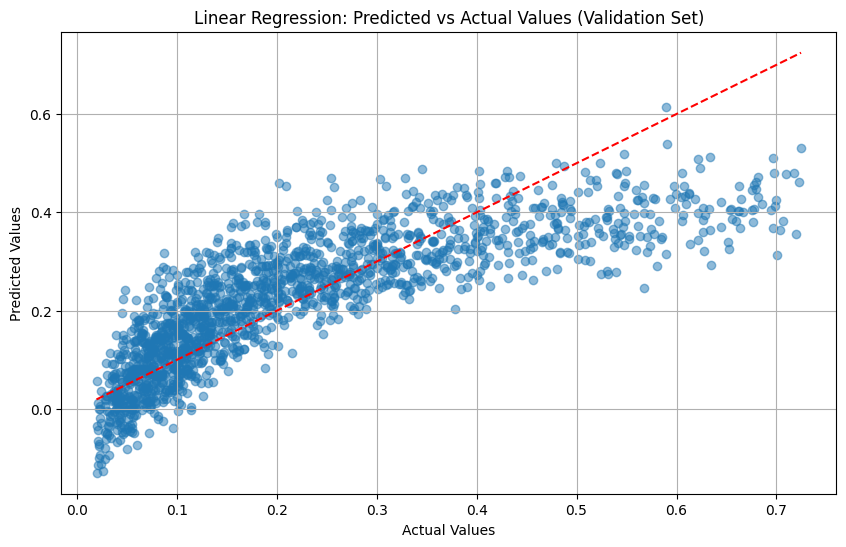

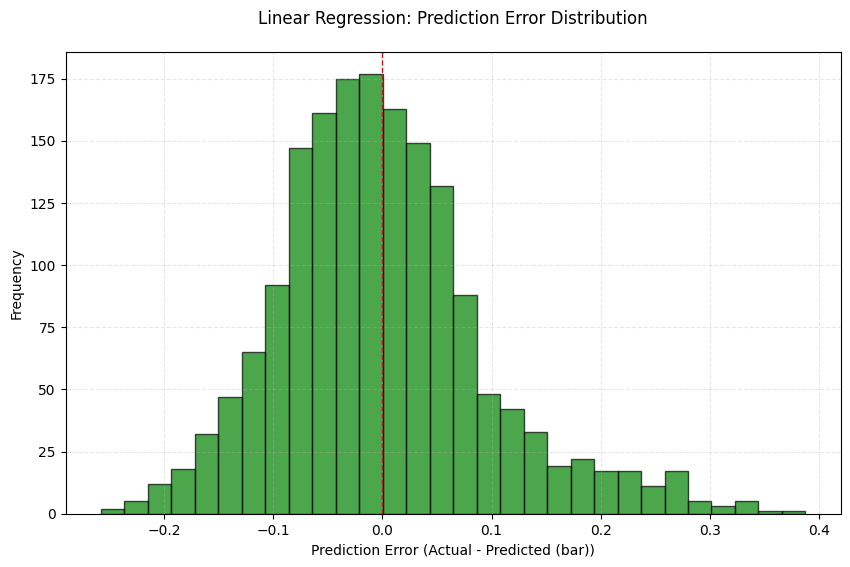

In [ ]:
# create plot for pred vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_lr, y_pred_val_lr, alpha=0.5)
plt.plot([y_val_lr.min(), y_val_lr.max()], [y_val_lr.min(), y_val_lr.max()], 'r--')
plt.title('Linear Regression: Predicted vs Actual Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

print('\n')

# create plot for error distribution
residuals = y_val_lr - y_pred_val_lr
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Linear Regression: Prediction Error Distribution', pad=20)
plt.xlabel('Prediction Error (Actual - Predicted (bar))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 2.3: Random Forest Model

Import necessary libraries

In [ ]:
from sklearn.ensemble import RandomForestRegressor

Train, create predictions and get metrics for RF model

In [ ]:
# def features for rf
X_train_rf = X_train
X_val_rf = X_val
y_train_rf = y_train
y_val_rf = y_val

# testing params
n_estimators_list = [10, 50, 100]
max_depths = [10, 20, None]
rf_results = {}
best_rf_val_mse = float('inf')
best_rf_model = None
best_rf_params = {}

# train + evaluate rf
for n_estimators in n_estimators_list:
    for max_depth in max_depths:
        depth_name = str(max_depth) if max_depth is not None else "unlimited"
        model_name = f"n_est={n_estimators}, depth={depth_name}"

        # create + train
        rf = RandomForestRegressor(
            n_estimators = n_estimators,
            max_depth = max_depth,
            random_state = 42,
            n_jobs = -1
        )
        rf.fit(X_train_rf, y_train_rf)

        # get predictions
        y_pred_train_rf_iter = rf.predict(X_train_rf)
        y_pred_val_rf_iter = rf.predict(X_val_rf)

        # calc metrics
        mse_train = mean_squared_error(y_train_rf, y_pred_train_rf_iter)
        mse_val = mean_squared_error(y_val_rf, y_pred_val_rf_iter)
        mape_train = mean_absolute_percentage_error(y_train_rf, y_pred_train_rf_iter)
        mape_val = mean_absolute_percentage_error(y_val_rf, y_pred_val_rf_iter)
        r2_train = r2_score(y_train_rf, y_pred_train_rf_iter)
        r2_val = r2_score(y_val_rf, y_pred_val_rf_iter)

        rf_results[model_name] = {
            'mse_train': mse_train,
            'mse_val': mse_val,
            'mape_train': mape_train,
            'mape_val': mape_val,
            'r2_train': r2_train,
            'r2_val': r2_val,
            'model': rf
        }

        # use mse for best model
        if mse_val < best_rf_val_mse:
            best_rf_val_mse = mse_val
            best_rf_model = rf
            best_rf_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

# dataframe for results
results_rf_list = []
for model_name, metrics in rf_results.items():
    n_est = int(model_name.split(',')[0].split('=')[1])
    m_depth = model_name.split(',')[1].split('=')[1].strip()
    results_rf_list.append({
        'n_estimators': n_est,
        'max_depth': m_depth,
        'Train MSE': metrics['mse_train'],
        'Val MSE': metrics['mse_val'],
        'Train MAPE': metrics['mape_train'],
        'Val MAPE': metrics['mape_val'],
        'Train R²': metrics['r2_train'],
        'Val R²': metrics['r2_val']
    })

rf_df = pd.DataFrame(results_rf_list)
rf_df['max_depth'] = pd.Categorical(rf_df['max_depth'], categories=['10', '20', 'unlimited'], ordered=True)
rf_df = rf_df.sort_values(['n_estimators', 'max_depth'])

# print info
print("\nRandom Forest Performance by Parameters:")
display(rf_df[['n_estimators', 'max_depth', 'Train MSE', 'Val MSE', 'Train MAPE', 'Val MAPE', 'Train R²', 'Val R²']])

# save best rf
joblib.dump(best_rf_model, 'rf_model.pkl')
print(f"\nSaved best Random Forest model (params: {best_rf_params}) to rf_model.pkl")


Random Forest Performance by Parameters:


,n_estimators,max_depth,Train MSE,Val MSE,Train MAPE,Val MAPE,Train R²,Val R²
0,10,10,0.002184,0.004326,0.160046,0.235532,0.920930,0.837483
1,10,20,0.000678,0.003360,0.083287,0.201879,0.975456,0.873750
2,10,unlimited,0.000683,0.003420,0.083662,0.202596,0.975259,0.871524
3,50,10,0.001913,0.003848,0.151386,0.223133,0.930731,0.855443
4,50,20,0.000464,0.002970,0.072401,0.189414,0.983205,0.888429
5,50,unlimited,0.000462,0.002989,0.072360,0.189908,0.983289,0.887707
6,100,10,0.001901,0.003849,0.151271,0.222989,0.931154,0.855405
7,100,20,0.000432,0.002923,0.071100,0.187406,0.984350,0.890170
8,100,unlimited,0.000428,0.002933,0.070869,0.187947,0.984509,0.889829



Saved best Random Forest model (params: {'n_estimators': 100, 'max_depth': 20}) to rf_model.pkl


Evaluate the best model found

In [ ]:
y_pred_train_rf_best = best_rf_model.predict(X_train_rf)
y_pred_val_rf_best = best_rf_model.predict(X_val_rf)

mse_train_rf = mean_squared_error(y_train_rf, y_pred_train_rf_best)
mse_val_rf = mean_squared_error(y_val_rf, y_pred_val_rf_best)
mape_train_rf = mean_absolute_percentage_error(y_train_rf, y_pred_train_rf_best)
mape_val_rf = mean_absolute_percentage_error(y_val_rf, y_pred_val_rf_best)
r2_train_rf = r2_score(y_train_rf, y_pred_train_rf_best)
r2_val_rf = r2_score(y_val_rf, y_pred_val_rf_best)

# save metrics
best_rf_metrics = {
    'Metric': ['MSE', 'MAPE', 'R²'],
    'Training': [mse_train_rf, mape_train_rf, r2_train_rf],
    'Validation': [mse_val_rf, mape_val_rf, r2_val_rf]
}

best_rf_df = pd.DataFrame(best_rf_metrics)

# print info
print("\nBest Random Forest Model Performance:")
display(best_rf_df)


Best Random Forest Model Performance:


,Metric,Training,Validation
0,MSE,0.000432,0.002923
1,MAPE,0.071100,0.187406
2,R²,0.984350,0.890170


Feature importance for best RF model

In [ ]:
importances = best_rf_model.feature_importances_
feature_names = X_train_rf.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Best Random Forest):")
display(feature_importance_df.head(10))


Feature Importances (Best Random Forest):


,Feature,Importance
17,Sensor ID,0.313440
18,Sensor Position Side,0.178485
6,Vapour Height (m),0.078115
3,Tank Length (m),0.059121
20,Sensor Position y,0.050710
0,Tank Failure Pressure (bar),0.037492
21,Sensor Position z,0.036029
19,Sensor Position x,0.028644
2,Tank Width (m),0.025877
25,Obstacle Volume,0.024932


Visualisations for RF model

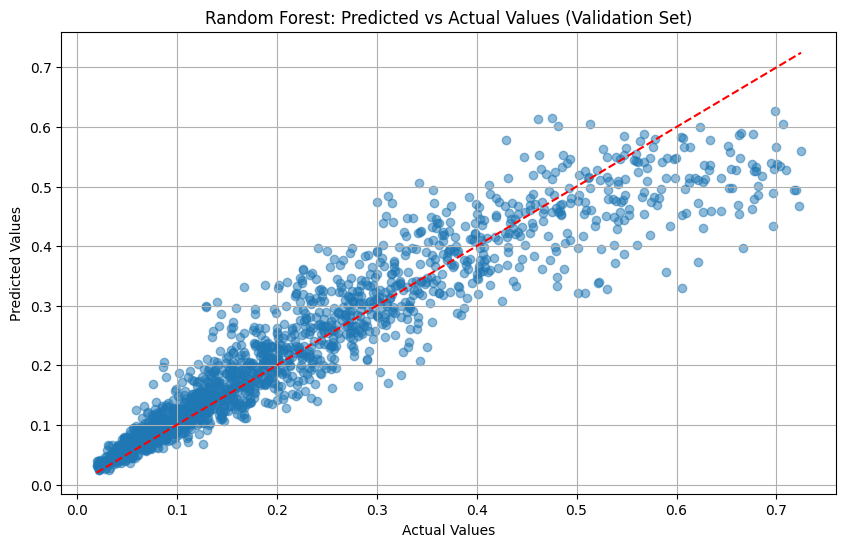

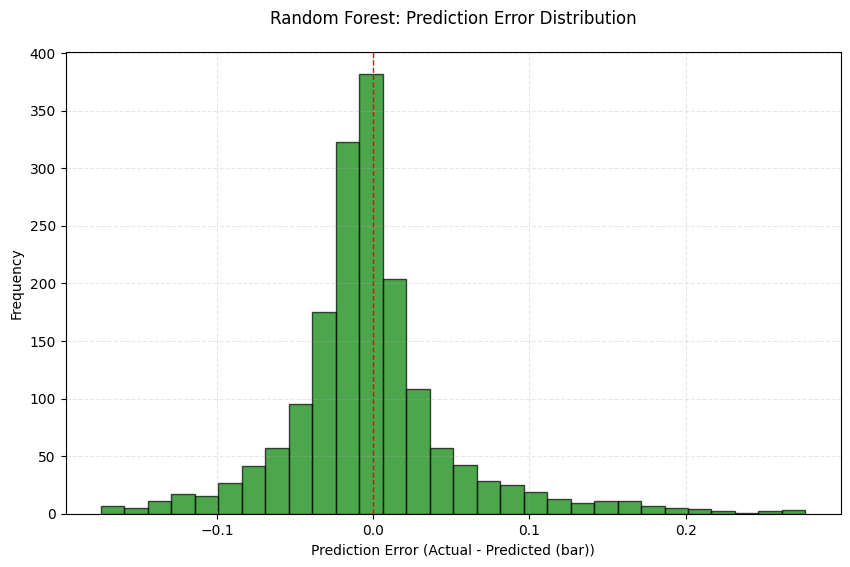

In [ ]:
# create plot for pred vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_rf, y_pred_val_rf_best, alpha=0.5)
plt.plot([y_val_rf.min(), y_val_rf.max()], [y_val_rf.min(), y_val_rf.max()], 'r--')
plt.title('Random Forest: Predicted vs Actual Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

print('\n')

# create plot for error distribution
residuals2 = y_val_rf - y_pred_val_rf_best
plt.figure(figsize=(10, 6))
plt.hist(residuals2, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Random Forest: Prediction Error Distribution', pad=20)
plt.xlabel('Prediction Error (Actual - Predicted (bar))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()




# 2.4: Neural Network Model

Import necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

Define features for NN model

In [ ]:
# features for nn
X_train_nn = X_train
X_val_nn = X_val
y_train_nn = y_train
y_val_nn = y_val

# nn architecture
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_nn.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])

# compile model
nn_model.compile(optimizer='adam', loss='mse')

# def early stop
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train NN model

In [ ]:
history = nn_model.fit(
    X_train_nn,
    y_train_nn,
    validation_data=(X_val_nn, y_val_nn),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],

    # set 1 to see progess
    verbose=1
)

# save trained nn model
nn_model.save('nn_model.keras')
print("\nSaved trained Neural Network model to nn_model.keras\n")

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4077 - val_loss: 0.0298
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0398 - val_loss: 0.0267
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0295 - val_loss: 0.0255
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0274 - val_loss: 0.0241
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0251 - val_loss: 0.0206
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0213 - val_loss: 0.0172
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0209 - val_loss: 0.0160
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0188 - val_loss: 0.0145
Epoch 9/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0165 - val_loss: 0.0127
Epoch 10/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0151 - val_loss: 0.0110
Epoch 11/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0132 - val_loss: 0.0105
Epoch 12/100
214/214 ━━━━━━━━━━━━━━━━━━━━

Evaluate NN model

In [ ]:
# evaluate nn model
y_pred_train_nn = nn_model.predict(X_train_nn).flatten()
y_pred_val_nn = nn_model.predict(X_val_nn).flatten()

214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Get metrics for NN model

In [ ]:
# calc metrics
mse_train_nn = mean_squared_error(y_train_nn, y_pred_train_nn)
mse_val_nn = mean_squared_error(y_val_nn, y_pred_val_nn)
mape_train_nn = mean_absolute_percentage_error(y_train_nn, y_pred_train_nn)
mape_val_nn = mean_absolute_percentage_error(y_val_nn, y_pred_val_nn)
r2_train_nn = r2_score(y_train_nn, y_pred_train_nn)
r2_val_nn = r2_score(y_val_nn, y_pred_val_nn)

nn_metrics = {
    'Metric': ['MSE', 'MAPE', 'R²'] ,
    'Training': [mse_train_nn, mape_train_nn, r2_train_nn],
    'Validation': [mse_val_nn, mape_val_nn, r2_val_nn]
}
nn_performance_df = pd.DataFrame(nn_metrics)

# print info
print("\nNeural Network Performance:")
display(nn_performance_df)


Neural Network Performance:


,Metric,Training,Validation
0,MSE,0.001656,0.002335
1,MAPE,0.189725,0.203283
2,R²,0.940025,0.912291


Visualisations for NN model

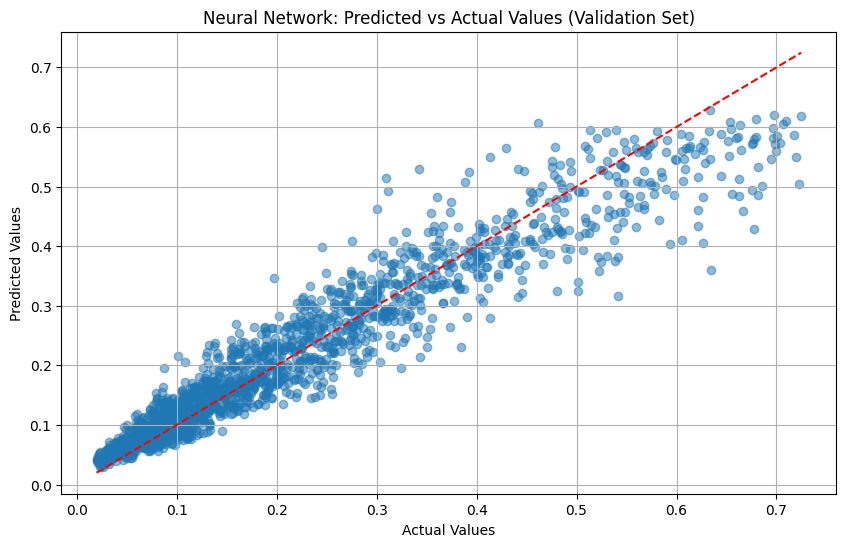

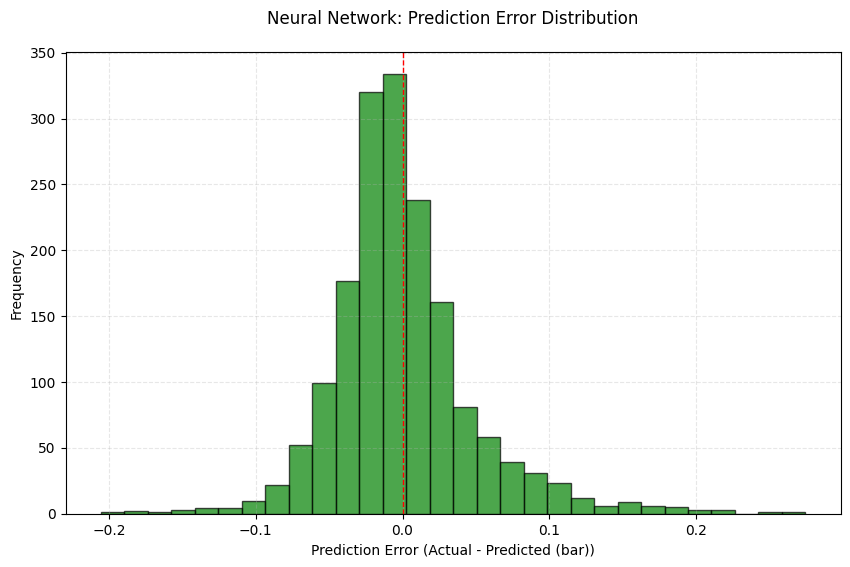

In [ ]:
# create plot for pred vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val_nn, y_pred_val_nn, alpha=0.5)
plt.plot([y_val_nn.min(), y_val_nn.max()], [y_val_nn.min(), y_val_nn.max()], 'r--')
plt.title('Neural Network: Predicted vs Actual Values (Validation Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()
print('\n')

# create plot error distribution
residuals3 = y_val_nn - y_pred_val_nn
plt.figure(figsize=(10, 6))
plt.hist(residuals3, bins=30, color='green', alpha=0.7, edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.title('Neural Network: Prediction Error Distribution', pad=20)
plt.xlabel('Prediction Error (Actual - Predicted (bar))')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# 2.5: Model Comparison + Evaluation

Compare different model performances

In [ ]:
# print info
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Neural Network'],
    'MAPE': [mape_val_lr, mape_val_rf, mape_val_nn],
    'R²': [r2_val_lr, r2_val_rf, r2_val_nn]
})

print("\nModel Comparison (Validation Set):")
display(comparison_df)


Model Comparison (Validation Set):


,Model,MAPE,R²
0,Linear Regression,0.513822,0.658094
1,Random Forest,0.187406,0.890170
2,Neural Network,0.203283,0.912291


Visualisation for comparison of model performance

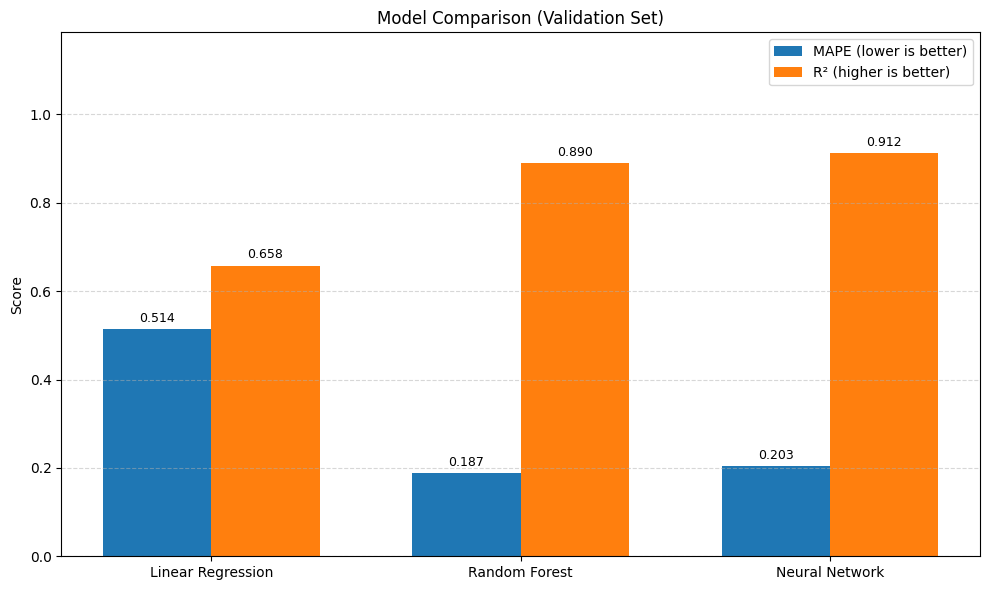

In [ ]:
# bar graph
models = ['Linear Regression', 'Random Forest', 'Neural Network']
mape_values = [mape_val_lr, mape_val_rf, mape_val_nn]
r2_values = [r2_val_lr, r2_val_rf, r2_val_nn]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2, mape_values, width, label='MAPE (lower is better)')
ax.bar(x + width/2, r2_values, width, label='R² (higher is better)')

ax.set_ylabel('Score')
ax.set_title('Model Comparison (Validation Set)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

for values, offset in zip([mape_values, r2_values], [-width/2, width/2]):
    for xi, val in zip(x, values):
        ax.text(xi + offset, val + 0.01, f'{val:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_ylim(0, max(max(mape_values), max(r2_values)) * 1.3)
ax.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **Step 3: Generate Predictions on Test Data**

# 3.1: Load and Preprocess Test Data

Load test data

In [ ]:
# load test data
test_data = pd.read_csv('test.csv')
print(f"Loaded test data: {test_data.shape}")

# final output needs original ids
test_ids = test_data['Unnamed: 0'].copy()

test_data.head()

Loaded test data: (3203, 24)


,Unnamed: 0,Tank Failure Pressure (bar),Liquid Ratio,Tank Width (m),Tank Length (m),Tank Height (m),BLEVE Height (m),Vapour Height (m),Vapour Temperature (K),Liquid Temperature (K),Obstacle Distance to BLEVE (m),Obstacle Width (m),Obstacle Height (m),Obstacle Thickness (m),Obstacle Angle,Status,Liquid Critical Pressure (bar),Liquid Boiling Temperature (K),Liquid Critical Temperature (K),Sensor ID,Sensor Position Side,Sensor Position x,Sensor Position y,Sensor Position z
0,0,37.9,0.412227,0.8,6.6,0.4,0.8,0.2,317.6,337.5,7,9,12,0.6,0,Subcooled,42.5,-42,96.7,1,1,8.05,-4.3,-0.7
1,1,37.9,0.412227,0.8,6.6,0.4,0.8,0.2,317.6,337.5,7,9,12,0.6,0,Subcooled,42.5,-42,96.7,2,1,8.05,-4.3,5.1
2,2,37.9,0.412227,0.8,6.6,0.4,0.8,0.2,317.6,337.5,7,9,12,0.6,0,Subcooled,42.5,-42,96.7,3,1,8.05,-4.3,10.9
3,3,37.9,0.412227,0.8,6.6,0.4,0.8,0.2,317.6,337.5,7,9,12,0.6,0,Subcooled,42.5,-42,96.7,4,1,8.05,0.0,-0.7
4,4,37.9,0.412227,0.8,6.6,0.4,0.8,0.2,317.6,337.5,7,9,12,0.6,0,Subcooled,42.5,-42,96.7,5,1,8.05,0.0,5.1




Preprocess test data steps

1. One hot encoding for status

In [ ]:
# one hot encoding for staus
test_data['Status'] = test_data['Status'].astype(str).str.strip().str.lower()
test_status_encoded = test_data['Status'].apply(lambda x: pd.Series(encode_status(x)))
test_status_encoded.columns = ['Status_Superheated', 'Status_Subcooled']
test_data[['Status_Superheated', 'Status_Subcooled']] = test_status_encoded.astype('Int64')

# unknown status rows dropped
test_data = test_data.dropna(subset = ['Status_Superheated', 'Status_Subcooled'])
test_data = test_data.drop(columns = ['Status'])
print(f"Test data shape after status processing: {test_data.shape}")

Test data shape after status processing: (3203, 25)


2. Sensor ID

In [ ]:
# sensor id
test_data['Sensor ID'] = correct_empty_sensorid(test_data['Sensor ID'])

3. Missing values

In [ ]:
# missing values
train_medians = joblib.load('train_medians.pkl')
print("Loaded training medians")

missing_before_impute = test_data.isnull().sum()

for col, median_val in train_medians.items():
    if col in test_data.columns and test_data[col].isnull().any():
        test_data[col] = test_data[col].fillna(median_val)

# drop rows if missing values
if test_data.isnull().any().any():
    print("Dropping rows with NA")
    test_data.dropna(inplace=True)

print(f"Test data shape after imputation: {test_data.shape}")

Loaded training medians
Test data shape after imputation: (3203, 25)


4. Feature engineering

In [ ]:
# feature engineering
test_data['Tank W/L Ratio'] = test_data['Tank Width (m)'] / test_data['Tank Length (m)']
test_data['Obstacle Volume'] = test_data['Obstacle Width (m)'] * test_data['Obstacle Height (m)'] * test_data['Obstacle Thickness (m)']
test_data['Vapour Ratio'] = test_data['Vapour Height (m)'] / test_data['Tank Height (m)']
test_data['Temperature Difference'] = test_data['Vapour Temperature (K)'] - test_data['Liquid Temperature (K)']

# handle potential inf/-inf from division by 0
test_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# reimpute nans introduced by feature eng
for col in ['Tank W/L Ratio', 'Obstacle Volume', 'Vapour Ratio', 'Temperature Difference']:
    if col in train_medians:
        test_data[col] = test_data[col].fillna(train_medians[col])
    else:
        # if test cols dont match train cols
        median = test_data[col].median()
        test_data[col] = test_data[col].fillna(median)

print("Applied feature engineering to test data")

Applied feature engineering to test data


5. Feature selection




In [ ]:
#drop unnamed: 0
if 'Unnamed: 0' in test_data.columns:
    test_data_processed = test_data.drop(columns=['Unnamed: 0'])
    print("Removed 'Unnamed: 0' from test data")
else:
    test_data_processed = test_data.copy()

Removed 'Unnamed: 0' from test data


6. Feature scaling

In [ ]:
#feature scaling using training scaler
scaler = joblib.load('scaler.pkl')
print("Loaded fitted scaler")

#ensure test data cols match train data cols from scaling
if not all(f in test_data_processed.columns for f in features_to_scale):
    missing_cols = [f for f in features_to_scale if f not in test_data_processed.columns]
    present_cols = [f for f in features_to_scale if f in test_data_processed.columns]
    print(f"Warning: Test data missing columns required for scaling: {missing_cols}. Scaling only available columns: {present_cols}")
    features_to_scale_test = present_cols
else:
    features_to_scale_test = features_to_scale

if features_to_scale_test:
    test_data_processed[features_to_scale_test] = scaler.transform(test_data_processed[features_to_scale_test])
    print("Applied scaling to test data")
else:
    print("No features to scale in test data or columns mismatch")

Loaded fitted scaler
Applied scaling to test data


# 3.2: Generate Predictions

Feature alignment + load trained model

In [ ]:
X_test = test_data_processed[all_features]

# load trained models
lr_model = joblib.load('lr_model.pkl')
rf_model = joblib.load('rf_model.pkl')
nn_model = tf.keras.models.load_model('nn_model.keras')
print("Loaded trained models")

Loaded trained models


Use models on test data to make predictions

In [ ]:
# predict using each model
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
nn_predictions = nn_model.predict(X_test).flatten()

print("Generated predictions for all models")

# save predictions
# get rows remaing after preprocessing
final_test_index = test_data_processed.index

# dfs in required format
lr_pred_df = pd.DataFrame({
    'ID': test_ids.loc[final_test_index],
    'Target Pressure (bar)': lr_predictions
})
rf_pred_df = pd.DataFrame({
    'ID': test_ids.loc[final_test_index],
    'Target Pressure (bar)': rf_predictions
})
nn_pred_df = pd.DataFrame({
    'ID': test_ids.loc[final_test_index],
    'Target Pressure (bar)': nn_predictions
})

# save to csv
lr_pred_df.to_csv('lr_prediction_final4.csv', index=False)
rf_pred_df.to_csv('rf_prediction_final4.csv', index=False)
nn_pred_df.to_csv('nn_prediction_final4.csv', index=False)
nn_pred_df.to_csv('prediction4.csv', index=False)

# print info
print("\nModel test data predictions saved to:")
print("Linear Regression -> lr_predictions4.csv")
print("Random Forest -> rf_predictions4.csv")
print("Neural Network -> nn_predictions4.csv")

print("\nFinal model (NN) test data predictions saved to:")
print("prediction4.csv")

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Generated predictions for all models

Model test data predictions saved to:
Linear Regression -> lr_predictions4.csv
Random Forest -> rf_predictions4.csv
Neural Network -> nn_predictions4.csv

Final model (NN) test data predictions saved to:
prediction4.csv
